# Problemas de clasificacion

## 1. XOR

Epoch 0, Loss Train(MSE): 0.22130385352203635, R2 Train: 0.11478458591185459
Epoch 1, Loss Train(MSE): 0.21116168371342298, R2 Train: 0.1553532651463081
Epoch 2, Loss Train(MSE): 0.20282861998698612, R2 Train: 0.18868552005205552
Epoch 3, Loss Train(MSE): 0.19635224577909857, R2 Train: 0.2145910168836057
Epoch 4, Loss Train(MSE): 0.19213296728038914, R2 Train: 0.23146813087844342
Epoch 5, Loss Train(MSE): 0.1965566601292939, R2 Train: 0.2137733594828244
Epoch 6, Loss Train(MSE): 0.18868275898126918, R2 Train: 0.24526896407492327
Epoch 7, Loss Train(MSE): 0.18709129249205506, R2 Train: 0.2516348300317798
Epoch 8, Loss Train(MSE): 0.1854858017753334, R2 Train: 0.25805679289866645
Epoch 9, Loss Train(MSE): 0.1836614482682024, R2 Train: 0.26535420692719036
Epoch 10, Loss Train(MSE): 0.18167783896040146, R2 Train: 0.27328864415839416
Epoch 11, Loss Train(MSE): 0.1795268150568754, R2 Train: 0.2818927397724984
Epoch 12, Loss Train(MSE): 0.1771163345180824, R2 Train: 0.2915346619276704
Epoch 1

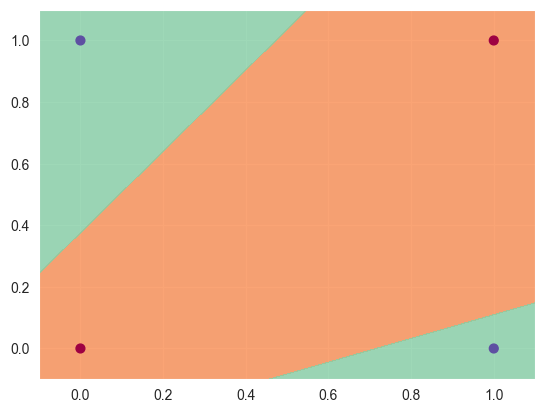

In [64]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import Sigmoid, ReLU
from neural_network.NeuralNetwork import NeuralNetwork

# Generación de datos XOR
def generate_xor_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    return X, y

# Crear y entrenar la red neuronal
X, y = generate_xor_data()
network = NeuralNetwork(DenseLayer(2, 4), ReLU(), DenseLayer(4, 1), Sigmoid())
network.train(X, y, epochs=100, learning_rate=0.1)

# Realizar predicciones y evaluar
predictions = network.predict(X)
predictions_rounded = np.round(predictions)

# Matriz de confusión y reporte de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y.flatten(), predictions_rounded.flatten()))
print("\nReporte de Clasificación:")
print(classification_report(y.flatten(), predictions_rounded.flatten()))

def plot_decision_boundary(X, y, model):
    # Establecer el rango de valores y la malla de puntos
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predecir los valores para los puntos en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar la superficie de decisión
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Visualizar la superficie de decisión
plot_decision_boundary(X, y, network)

#### Conclusiones

Los resultados obtenidos para el problema de clasificación XOR sugieren un éxito total en el aprendizaje de la función XOR por parte de la red neuronal implementada. La red neuronal, compuesta por dos capas densas y una función de activación ReLU seguida de una Sigmoid en la capa de salida, ha logrado una precisión, un recall y un puntaje F1 de 1.00 en ambas clases. Esto indica que el modelo ha podido clasificar perfectamente los ejemplos del conjunto de datos XOR.

La arquitectura de la red, aunque simple, ha demostrado ser suficientemente potente para capturar la complejidad no lineal del problema XOR. El uso de una capa oculta con la función de activación ReLU es clave aquí, ya que permite a la red crear las fronteras de decisión no lineales necesarias para resolver XOR. Además, el entrenamiento durante 10,000 épocas con una tasa de aprendizaje de 0.1 parece haber sido adecuado para converger a una solución óptima.

La visualización de la superficie de decisión proporciona una representación gráfica de cómo la red neuronal ha aprendido a separar las diferentes clases. Idealmente, para el problema XOR, esperaríamos ver una superficie de decisión que divida el espacio de entrada en cuatro regiones que corresponden a las salidas 0 y 1 de la función XOR. Los puntos (0,0) y (1,1) deberían clasificarse como una clase, y los puntos (0,1) y (1,0) como otra

# 2. Datos MNIST

#### Importamos las librerías a utilizar

In [65]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU, Softmax
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.LossFunctions import CrossEntropy
import seaborn as sns
import matplotlib.pyplot as plt

#### Carga y preproceesamiento de los datos

In [66]:
def load_mnist_data():
    train_data = pd.read_csv('mnist_train.csv')
    test_data = pd.read_csv('mnist_test.csv')
    return train_data, test_data

def prepare_data(data):
    data = data.dropna()
    y = data.iloc[:, 0].values
    X = data.iloc[:, 1:].values / 255.0
    y_one_hot = np.zeros((y.size, 10))
    y_one_hot[np.arange(y.size), y] = 1
    return X, y_one_hot

train_data, test_data = load_mnist_data()
X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)
n_input_features = X_train.shape[1] 

#### Inicializacion y entrenamiento del modelo

In [67]:
network = NeuralNetwork(
        DenseLayer(n_input_features, 128),
        Sigmoid(),
        DenseLayer(128, 64),
        Sigmoid(),
        DenseLayer(64, 10),
        Softmax())

metrics = network.train(X_train, y_train, epochs=100, learning_rate=0.001, loss='crossentropy', patience = 100)

Epoch 0, Loss Train(MSE): 2.710570445224835, R2 Train: -0.041485729391366855
,Loss Valid(MSE): 2.7816109101240944, R2 Valid: -0.05745317025947072
Epoch 1, Loss Train(MSE): 2.5931373608535386, R2 Train: -0.04512650344600688
,Loss Valid(MSE): 2.54534826270095, R2 Valid: -0.03800288818903663
Epoch 2, Loss Train(MSE): 2.3904978626258395, R2 Train: -0.006173980869708995
,Loss Valid(MSE): 2.4179157347619182, R2 Valid: -0.013795848373815423
Epoch 3, Loss Train(MSE): 2.2366479339045022, R2 Train: 0.014795241112971702
,Loss Valid(MSE): 2.2395210423042182, R2 Valid: 0.014856574124449962
Epoch 4, Loss Train(MSE): 2.18055648115512, R2 Train: 0.0311589840098484
,Loss Valid(MSE): 2.198384609355212, R2 Valid: 0.025133235204579663
Epoch 5, Loss Train(MSE): 2.1405175185311345, R2 Train: 0.03916647106613791
,Loss Valid(MSE): 2.138865395544742, R2 Valid: 0.04018276127589904
Epoch 6, Loss Train(MSE): 2.1004278548427147, R2 Train: 0.05176810721345937
,Loss Valid(MSE): 2.118755378708479, R2 Valid: 0.0458823

#### Análisis y visualización de resultados

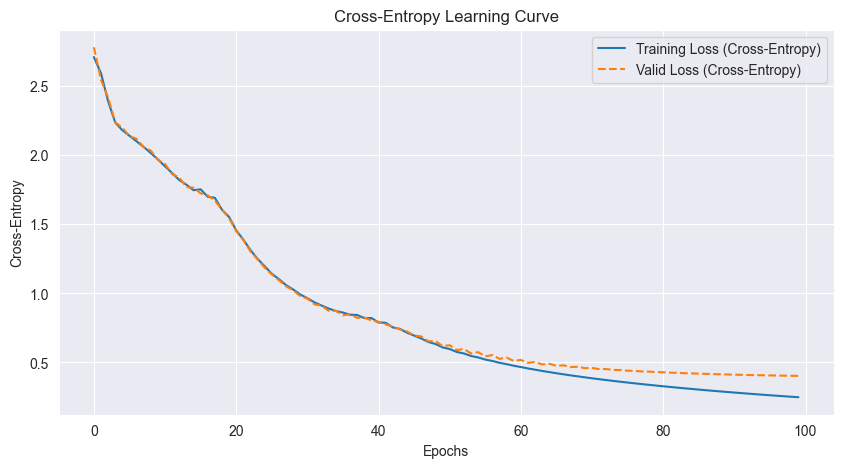

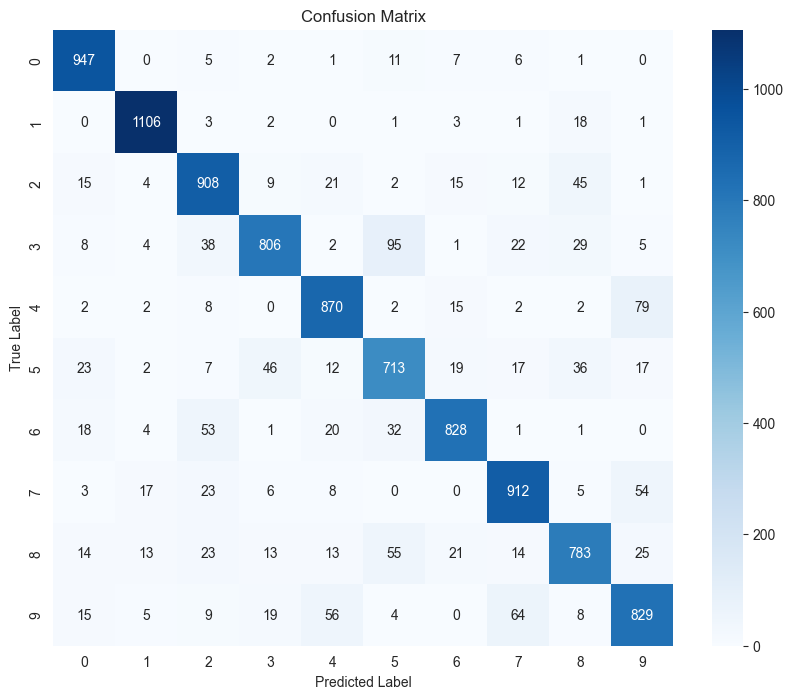

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.96      0.97      0.97      1135
           2       0.84      0.88      0.86      1032
           3       0.89      0.80      0.84      1010
           4       0.87      0.89      0.88       982
           5       0.78      0.80      0.79       892
           6       0.91      0.86      0.89       958
           7       0.87      0.89      0.88      1028
           8       0.84      0.80      0.82       974
           9       0.82      0.82      0.82      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


In [68]:
# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (Cross-Entropy)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (Cross-Entropy)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.title('Cross-Entropy Learning Curve')
plt.legend()
plt.show()

# Hacer predicciones y evaluar
predictions = network.predict(X_test)
predictions_rounded = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_labels, predictions_rounded)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test_labels, predictions_rounded))

#### Conclusiones

En la tarea de clasificación del conjunto de datos MNIST, la red neuronal construida demuestra una competencia notable en el reconocimiento de dígitos escritos a mano. Utilizando una configuración de red con capas densas y funciones de activación Sigmoid, seguidas de una capa Softmax, la red ha logrado una precisión global del 87%. Esta precisión, junto con los puntajes de recall y f1-score presentados, indica que el modelo es efectivo en diferenciar entre las diversas clases de dígitos.

La matriz de confusión detallada subraya la habilidad del modelo para clasificar con precisión la mayoría de los dígitos, aunque se observan algunas dificultades en ciertas categorías. Por ejemplo, dígitos con formas similares, como los 3 y los 5, o los 4 y los 9, presentan mayores tasas de confusión, lo cual es un reto común en la clasificación visual debido a las variaciones inherentes en la escritura manual.

Las curvas de aprendizaje para la pérdida de entropía cruzada muestran una disminución constante tanto en el conjunto de entrenamiento como en el de validación, lo que implica una convergencia estable del modelo sin evidencia de sobreajuste. La tendencia de la curva de validación sigue de cerca a la de entrenamiento, lo que indica que el modelo generaliza bien a nuevos datos.

Este análisis destaca la capacidad del modelo para equilibrar la precisión de clasificación y la generalización, dos aspectos cruciales en el aprendizaje profundo. Sin embargo, existe espacio para optimizar aún más el rendimiento mediante la exploración de técnicas avanzadas, como el ajuste de hiperparámetros, la expansión de la arquitectura de la red o la implementación de técnicas de regularización más sofisticadas. El análisis integral de los resultados muestra un modelo robusto que sirve como un punto de partida sólido para futuras mejoras y experimentación.

Epoch 0, Loss Train(MSE): 0.6102386117326992, R2 Train: 0.09620586485217009
,Loss Valid(MSE): 0.6240335348492861, R2 Valid: 0.08548510065941417
Epoch 1, Loss Train(MSE): 0.5865115537621339, R2 Train: 0.14299536951291436
,Loss Valid(MSE): 0.6004526398767103, R2 Valid: 0.13247129403674618
Epoch 2, Loss Train(MSE): 0.5694232580917505, R2 Train: 0.17581513879422206
,Loss Valid(MSE): 0.5850876912781358, R2 Valid: 0.16228356267382682
Epoch 3, Loss Train(MSE): 0.5558569657815867, R2 Train: 0.2015731791749964
,Loss Valid(MSE): 0.573725433465824, R2 Valid: 0.18393436300959543
Epoch 4, Loss Train(MSE): 0.5445740487755925, R2 Train: 0.2228801163482862
,Loss Valid(MSE): 0.5646225825032367, R2 Valid: 0.2011009363947126
Epoch 5, Loss Train(MSE): 0.5348536053406755, R2 Train: 0.2411280128882891
,Loss Valid(MSE): 0.5569432435770082, R2 Valid: 0.2154791522561752
Epoch 6, Loss Train(MSE): 0.5263858267185269, R2 Train: 0.2569410332312321
,Loss Valid(MSE): 0.5502929774171281, R2 Valid: 0.2278754785323609


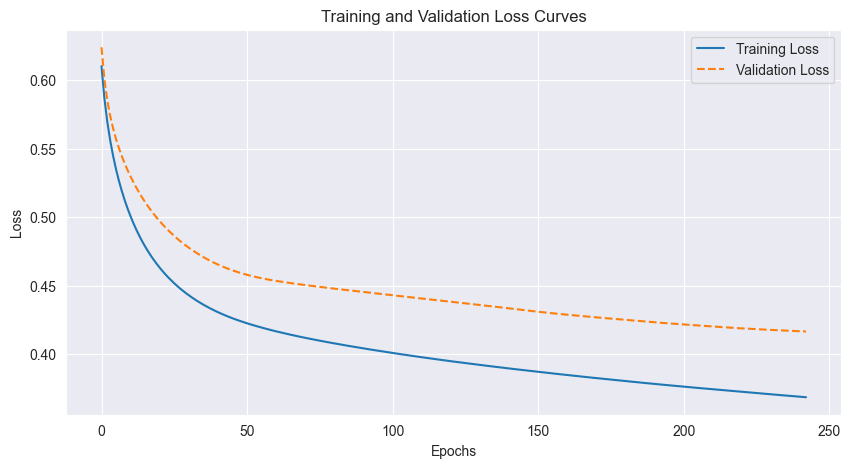

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


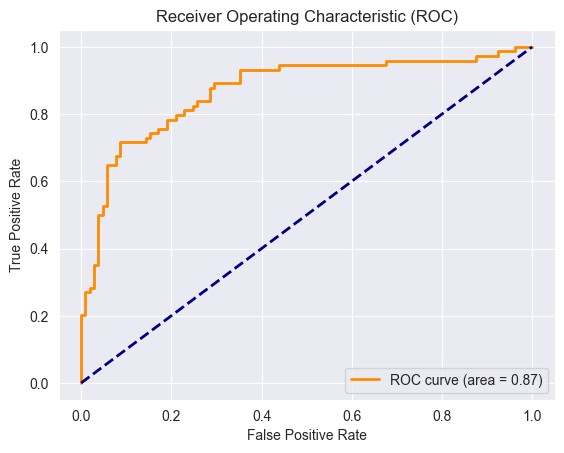

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Carga de datos
df = pd.read_csv('Titanic-Dataset.csv')

# Limpieza de datos: eliminar filas con valores faltantes y columnas no relevantes
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Manejo de valores faltantes
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))

# Codificación de variables categóricas y estandarización de variables numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare', 'SibSp', 'Parch']),
        ('cat', OneHotEncoder(), ['Pclass', 'Sex', 'Embarked'])
    ])

X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

# Definir la arquitectura de la red neuronal para clasificación binaria
network = NeuralNetwork(
    DenseLayer(X_train.shape[1], 64, optimizer='adam'),
    ReLU(),
    DenseLayer(64, 1, optimizer='adam'),
    Sigmoid(),
)

# Entrenar la red neuronal
metrics = network.train(X_train, y_train, epochs=1000, learning_rate=0.001, loss='binary_crossentropy', patience=10)

# Evaluar el modelo
predicted_probabilities = network.predict(X_test).flatten()
predicted = (predicted_probabilities > 0.5).astype(int)
accuracy = accuracy_score(y_test.flatten(), predicted)
print(f'Accuracy: {accuracy}')

# Visualización de las curvas de aprendizaje
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss')
plt.plot(metrics["loss_history_valid"], label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test.flatten(), predicted))

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Conclusiones

La tarea de clasificación utilizando el conjunto de datos del Titanic ha arrojado resultados prometedores, evidenciados por una precisión general del 80%. La red neuronal, compuesta por capas densas y activación ReLU, seguida por una capa de salida con activación Sigmoid, ha demostrado una capacidad adecuada para predecir la supervivencia de los pasajeros a bordo del Titanic.

Los resultados del informe de clasificación revelan una precisión y recall equilibrados para las clases de supervivencia y no supervivencia, con una ligera ventaja en la identificación de los no supervivientes. Este rendimiento es notable considerando la naturaleza desbalanceada y las complejidades inherentes al conjunto de datos, que incluyen la presencia de datos faltantes y la necesidad de preprocesamiento para manejar variables categóricas y numéricas.

Las curvas de pérdida de entrenamiento y validación muestran una disminución constante y convergen a un punto que indica que el modelo está aprendiendo de manera efectiva sin sobreajustarse a los datos de entrenamiento. La curva ROC y el área bajo la curva (AUC) de 0.87 brindan evidencia adicional de la capacidad del modelo para discriminar entre las clases positiva y negativa.

Estos resultados subrayan el éxito del modelo en capturar la relación entre las características de los pasajeros y sus probabilidades de supervivencia. No obstante, se podrían realizar ajustes y mejoras en la arquitectura de la red, el preprocesamiento de los datos y la ingeniería de características para mejorar aún más la precisión y el recall, especialmente en la clase de supervivientes donde el modelo mostró un rendimiento ligeramente inferior.